# E-commerce Customer Segmentation

Abstract:
        A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. 
        The trend can be easily observed if companies can group the customers;based on their activity on ecommerce site.
        This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on.

Problem Statement:
        Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest.

In [ ]:
#

In [3]:
# importing the libraries:
import yellowbrick
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
#

In [ ]:
# E-commerce Customer Segmentation:

In [4]:
# importing the data:
daf = pd.read_excel(r"C:\Users\DONMETHIL\Downloads\Xudemy\Z-ML\custdata.xlsx")
# 

In [5]:
daf.head(6) # listing the dataframe

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,F,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [6]:
daf.columns # listing the columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft'],
      dtype='object')

In [7]:
daf.shape

(30000, 38)

In [8]:
daf.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [9]:
daf.Gender.value_counts()

F    22054
M     5222
Name: Gender, dtype: int64

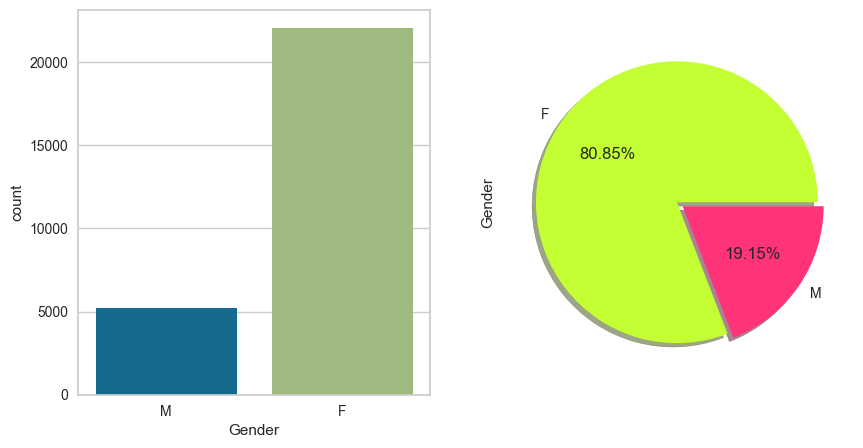

In [10]:
# PLotting to visualize:

plt.figure(figsize = [10,3])
plt.subplot(1,2,1)
sns.countplot(data=daf, x='Gender')
#plt.show()
# ------------------------------------------------- #
# ------------------------------------------------- #
plt.subplot(1,2,2)
daf['Gender'].value_counts().plot(kind = 'pie', 
                                    autopct = '%0.2f%%', 
                                    figsize = [10,5], 
                                    explode = [0,0.05], 
                                    colors = ['#C4FF33', '#FF337A'], 
                                    shadow = True)

plt.show()
# ------------------------------------------------- #

In [11]:
daf['Orders'].unique()

array([ 7,  0, 10,  4,  6,  9,  1,  8,  5,  3,  2, 11, 12], dtype=int64)

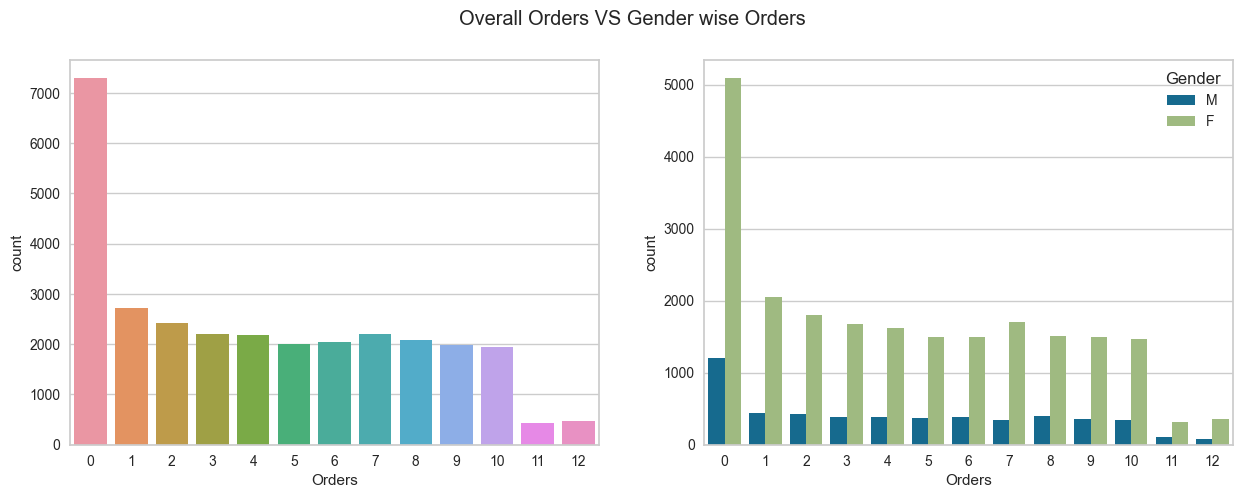

In [12]:
# Overall orders count:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.countplot(data=daf, x='Orders')

# Orders count by each gender:

plt.subplot(1,2,2)
sns.countplot(data=daf, x='Orders',hue='Gender')

plt.suptitle("Overall Orders VS Gender wise Orders")
plt.show()
# ------------------------------ #

In [13]:
daf.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [14]:
cols = list(daf.columns[3:])

In [15]:
cols

['Jordan',
 'Gatorade',
 'Samsung',
 'Asus',
 'Udis',
 'Mondelez International',
 'Wrangler',
 'Vans',
 'Fila',
 'Brooks',
 'H&M',
 'Dairy Queen',
 'Fendi',
 'Hewlett Packard',
 'Pladis',
 'Asics',
 'Siemens',
 'J.M. Smucker',
 'Pop Chips',
 'Juniper',
 'Huawei',
 'Compaq',
 'IBM',
 'Burberry',
 'Mi',
 'LG',
 'Dior',
 'Scabal',
 'Tommy Hilfiger',
 'Hollister',
 'Forever 21',
 'Colavita',
 'Microsoft',
 'Jiffy mix',
 'Kraft']

In [16]:
print(cols[0])
#
cols.index('J.M. Smucker') # Getting the index for the column:  'J.M. Smucker'

Jordan


17

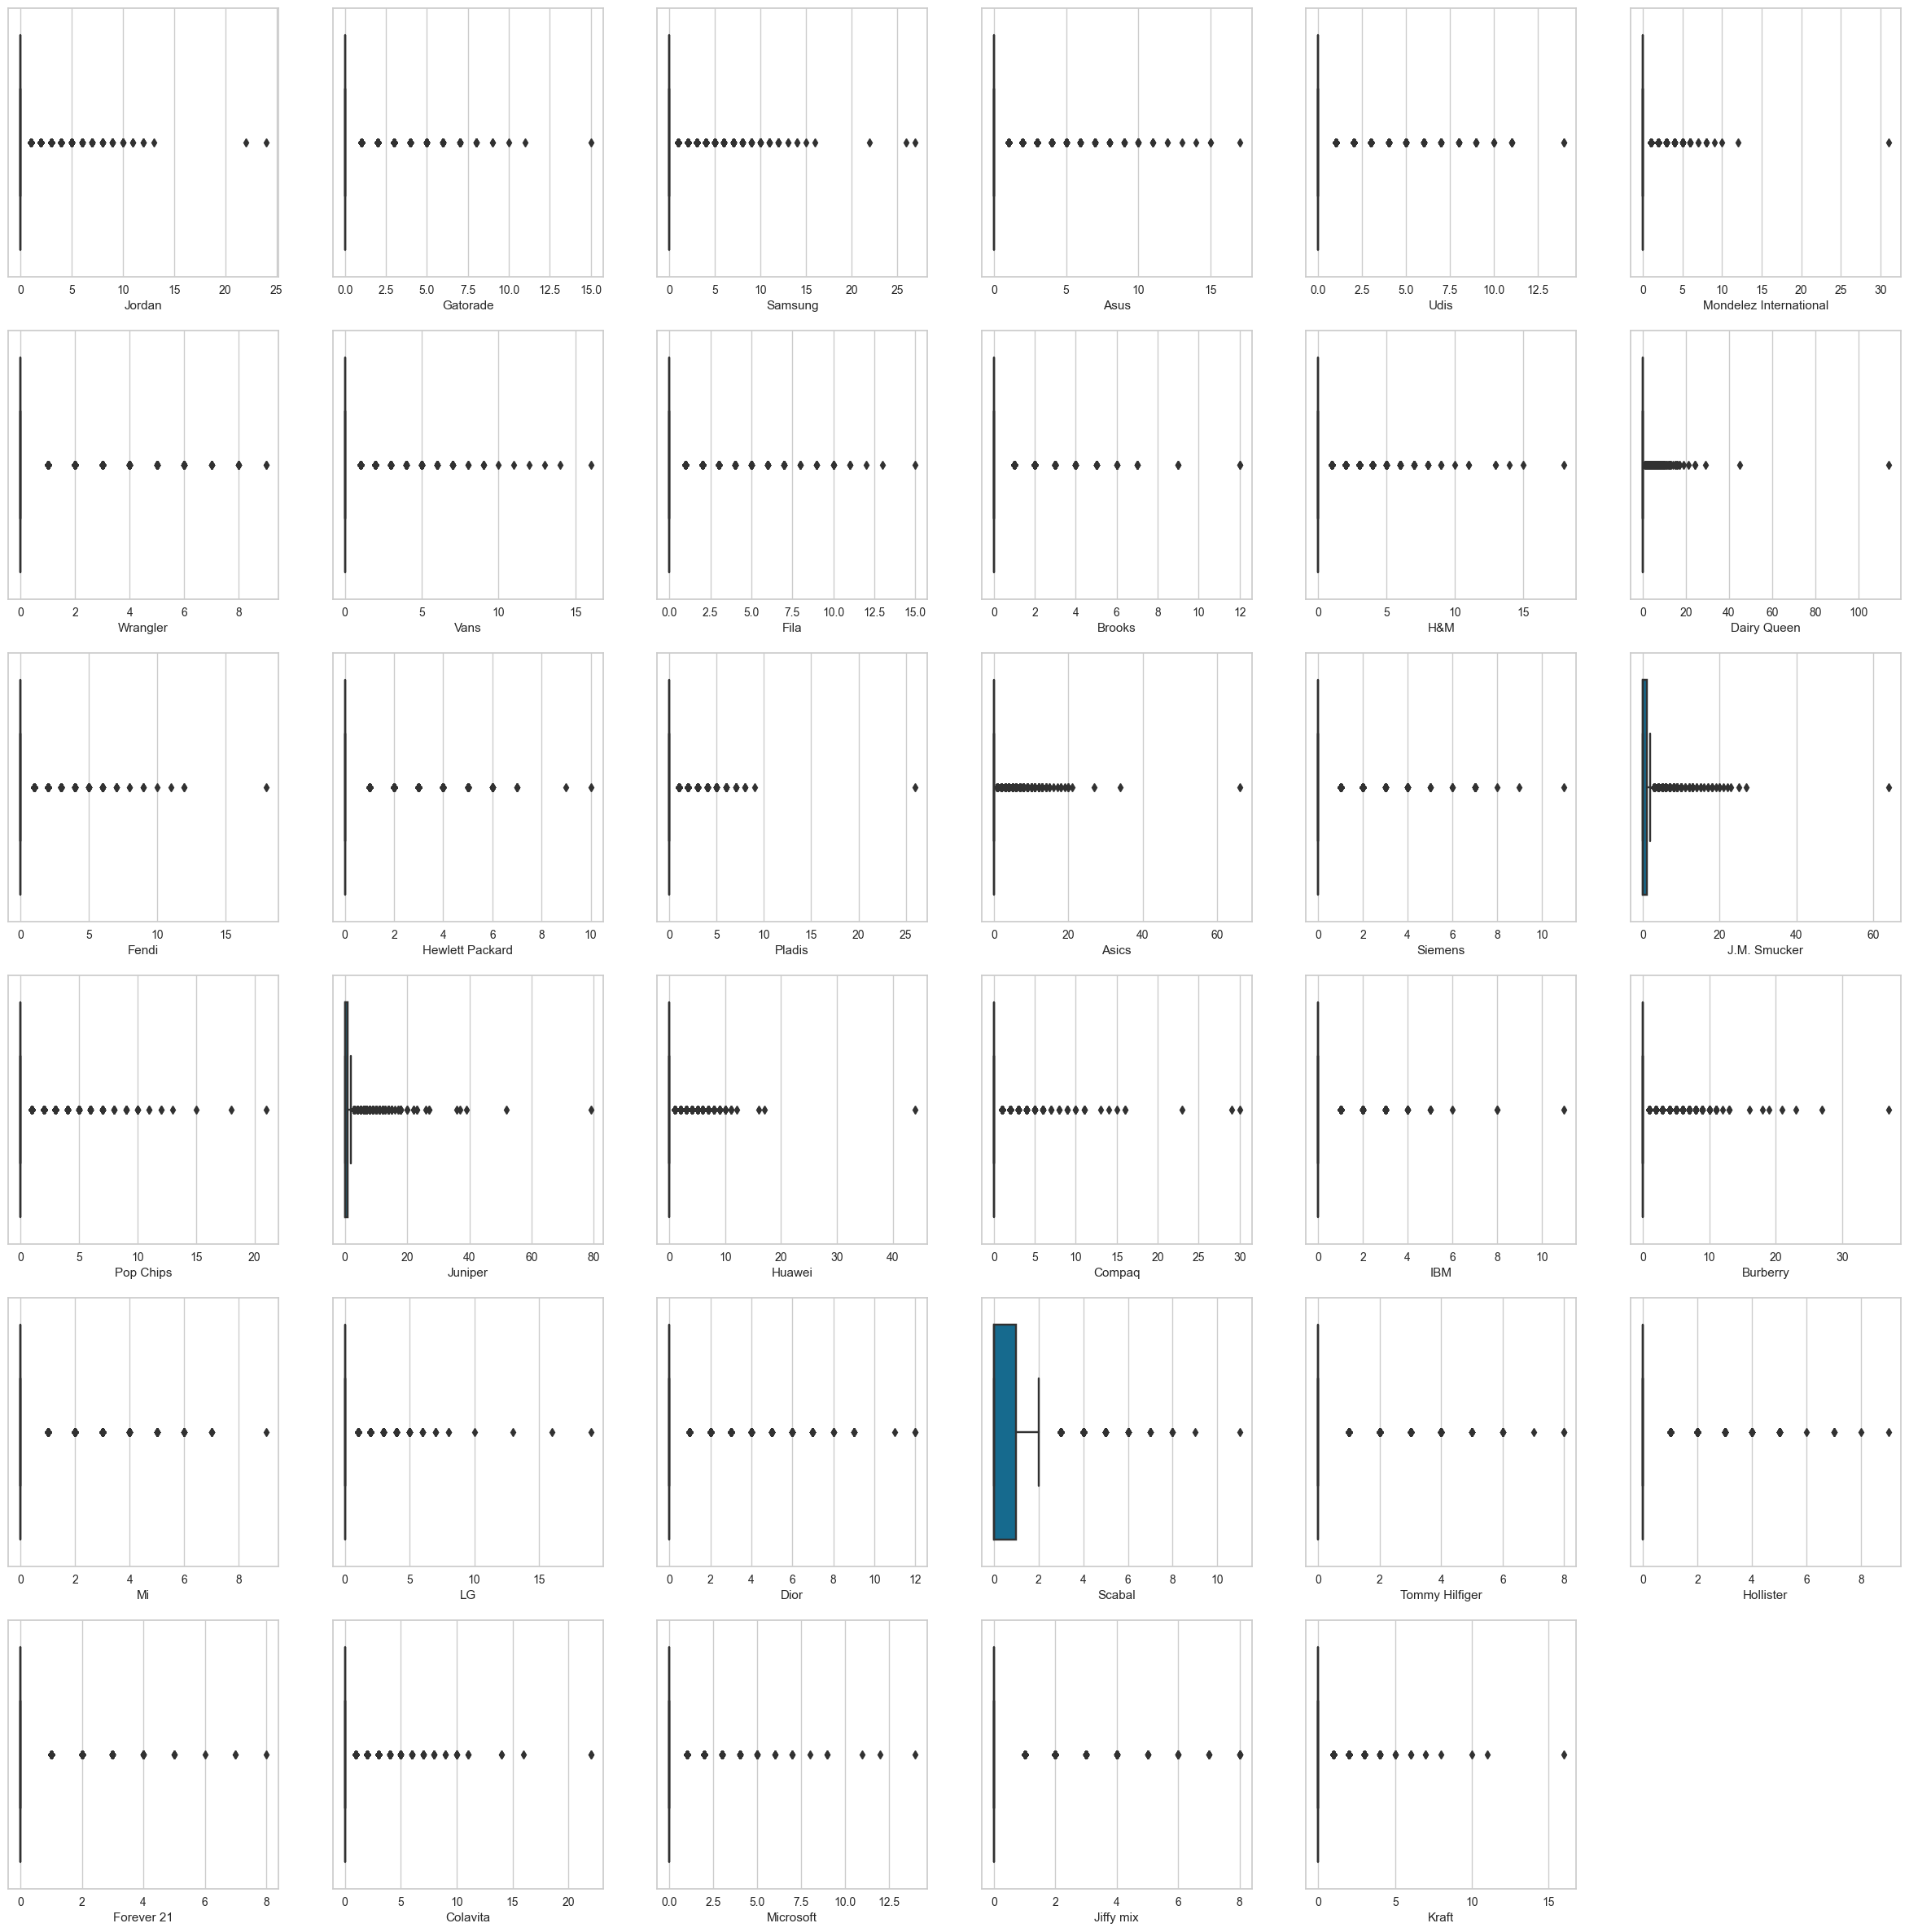

In [17]:
# Plottig the feature Columns:

def dist_list(lst):
    
    plt.figure(figsize=(30,30))
    
    for i,col in enumerate(lst,1):
        
        plt.subplot(6,6,i)
        sns.boxplot(data=daf,x=daf[col])    

#
dist_list(cols)

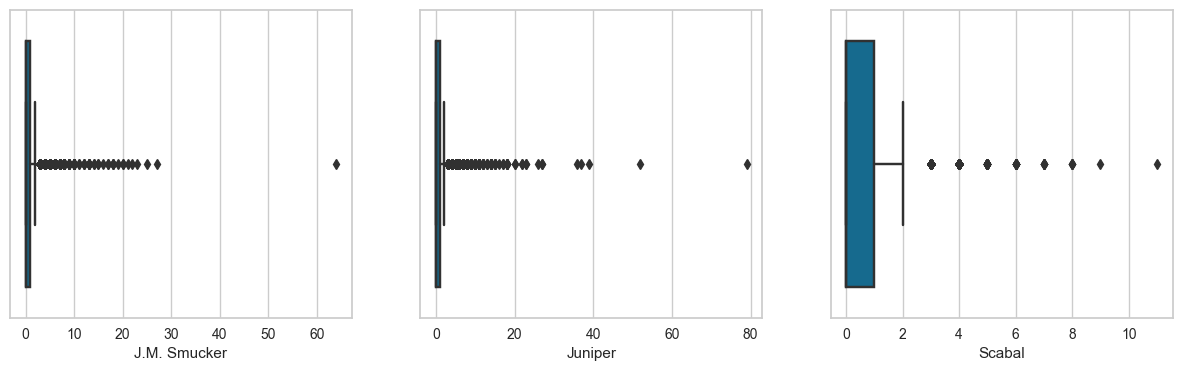

In [18]:
# ----------------------------- #
plt.figure(figsize=(15,4))
# ----------------------------- #
plt.subplot(1,3,1)
sns.boxplot(data=daf,x=cols[17]) 
# ----------------------------- #
plt.subplot(1,3,2)
sns.boxplot(data=daf,x=cols[19]) 
# ----------------------------- #
plt.subplot(1,3,3)
sns.boxplot(data=daf,x=cols[27]) 
# ----------------------------- #
plt.show()

In [ ]:
#

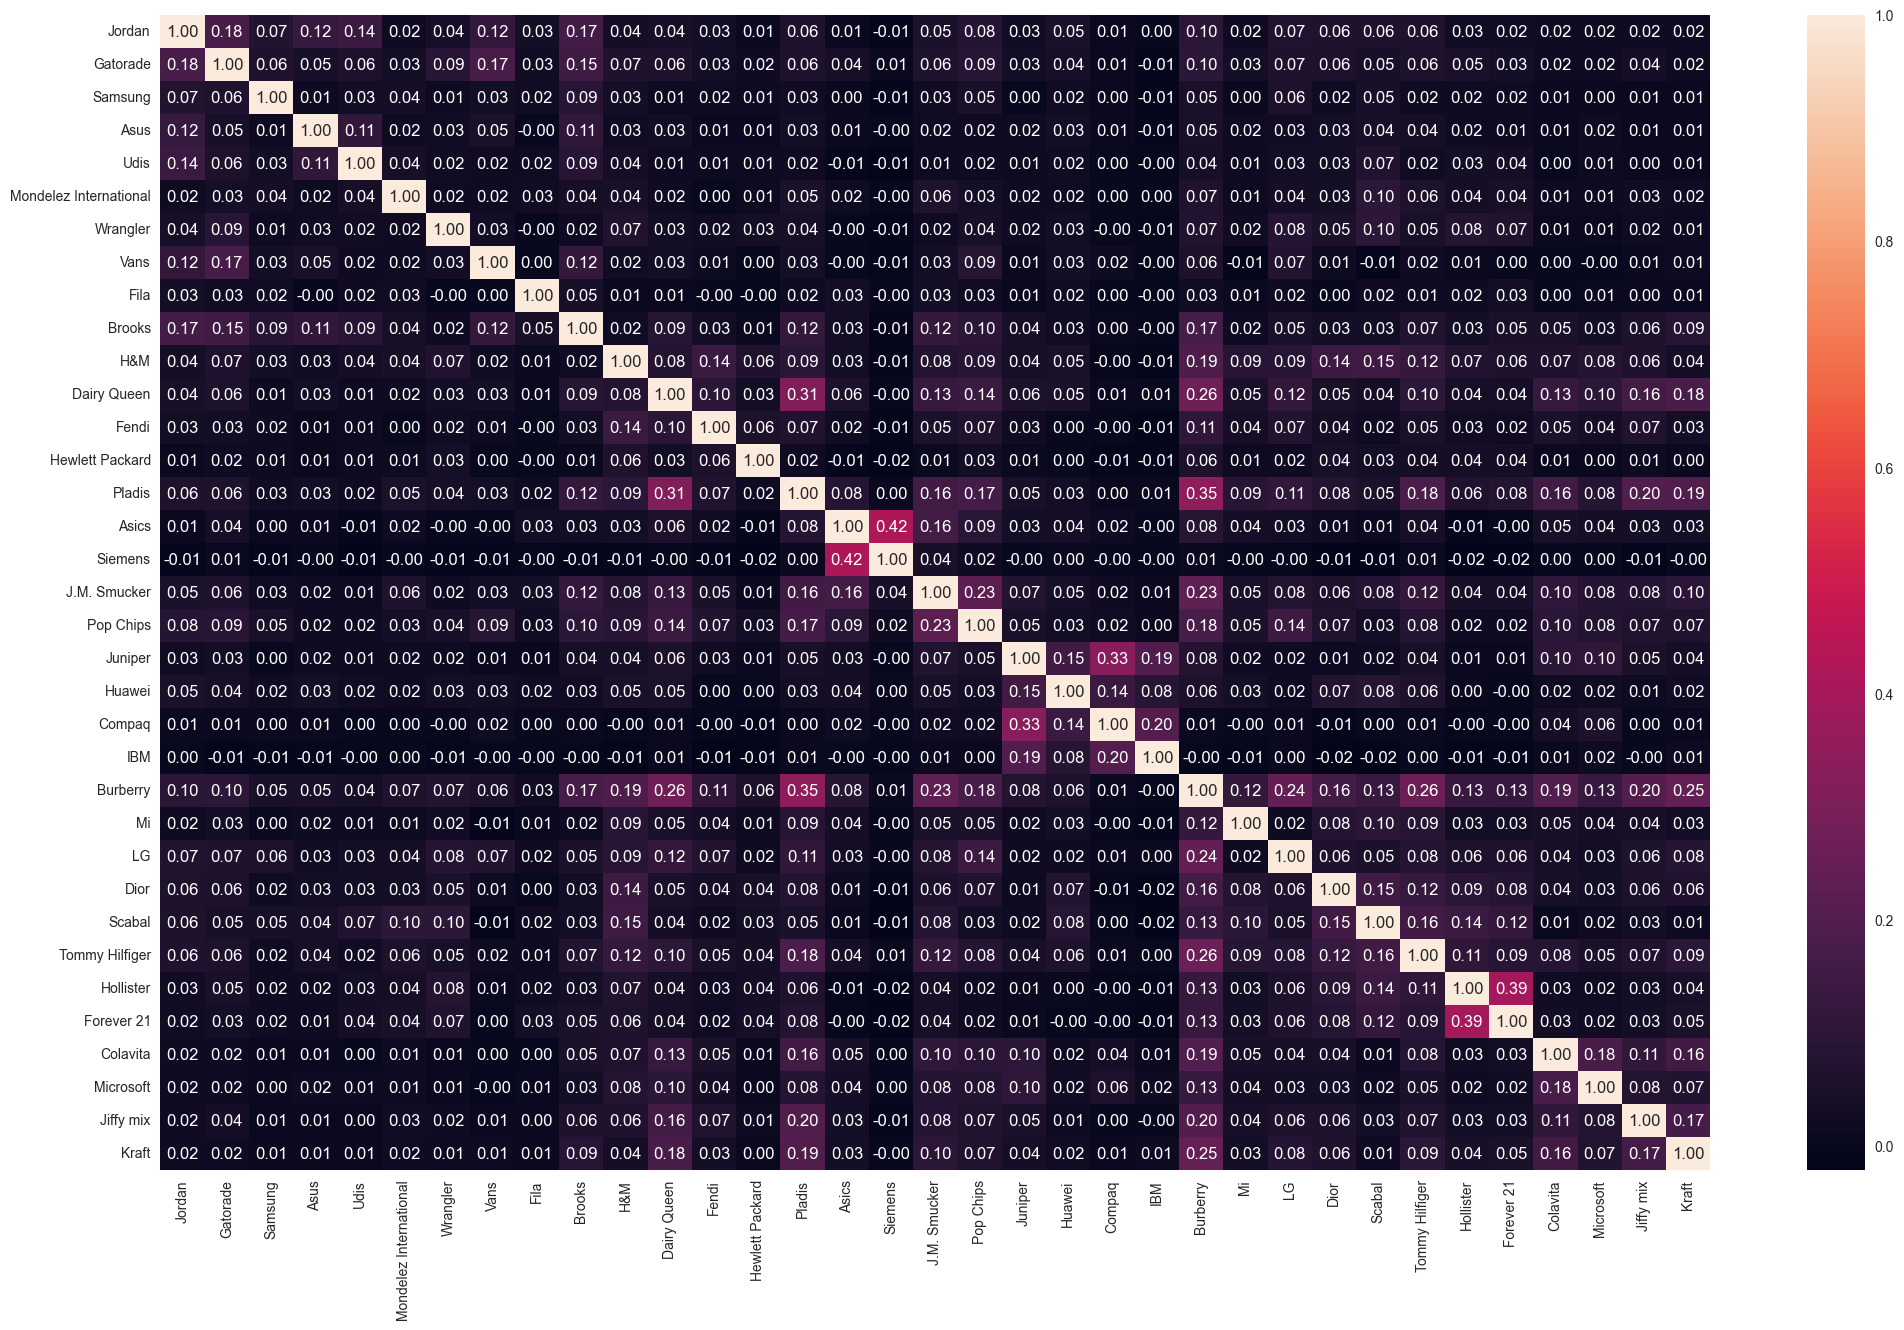

In [19]:
# Heat map Visualization:

plt.figure(figsize=(25,15))
#
dff = daf.iloc[:,3: ].corr()
sns.heatmap(dff, annot = True, fmt = '0.2f')

plt.show()

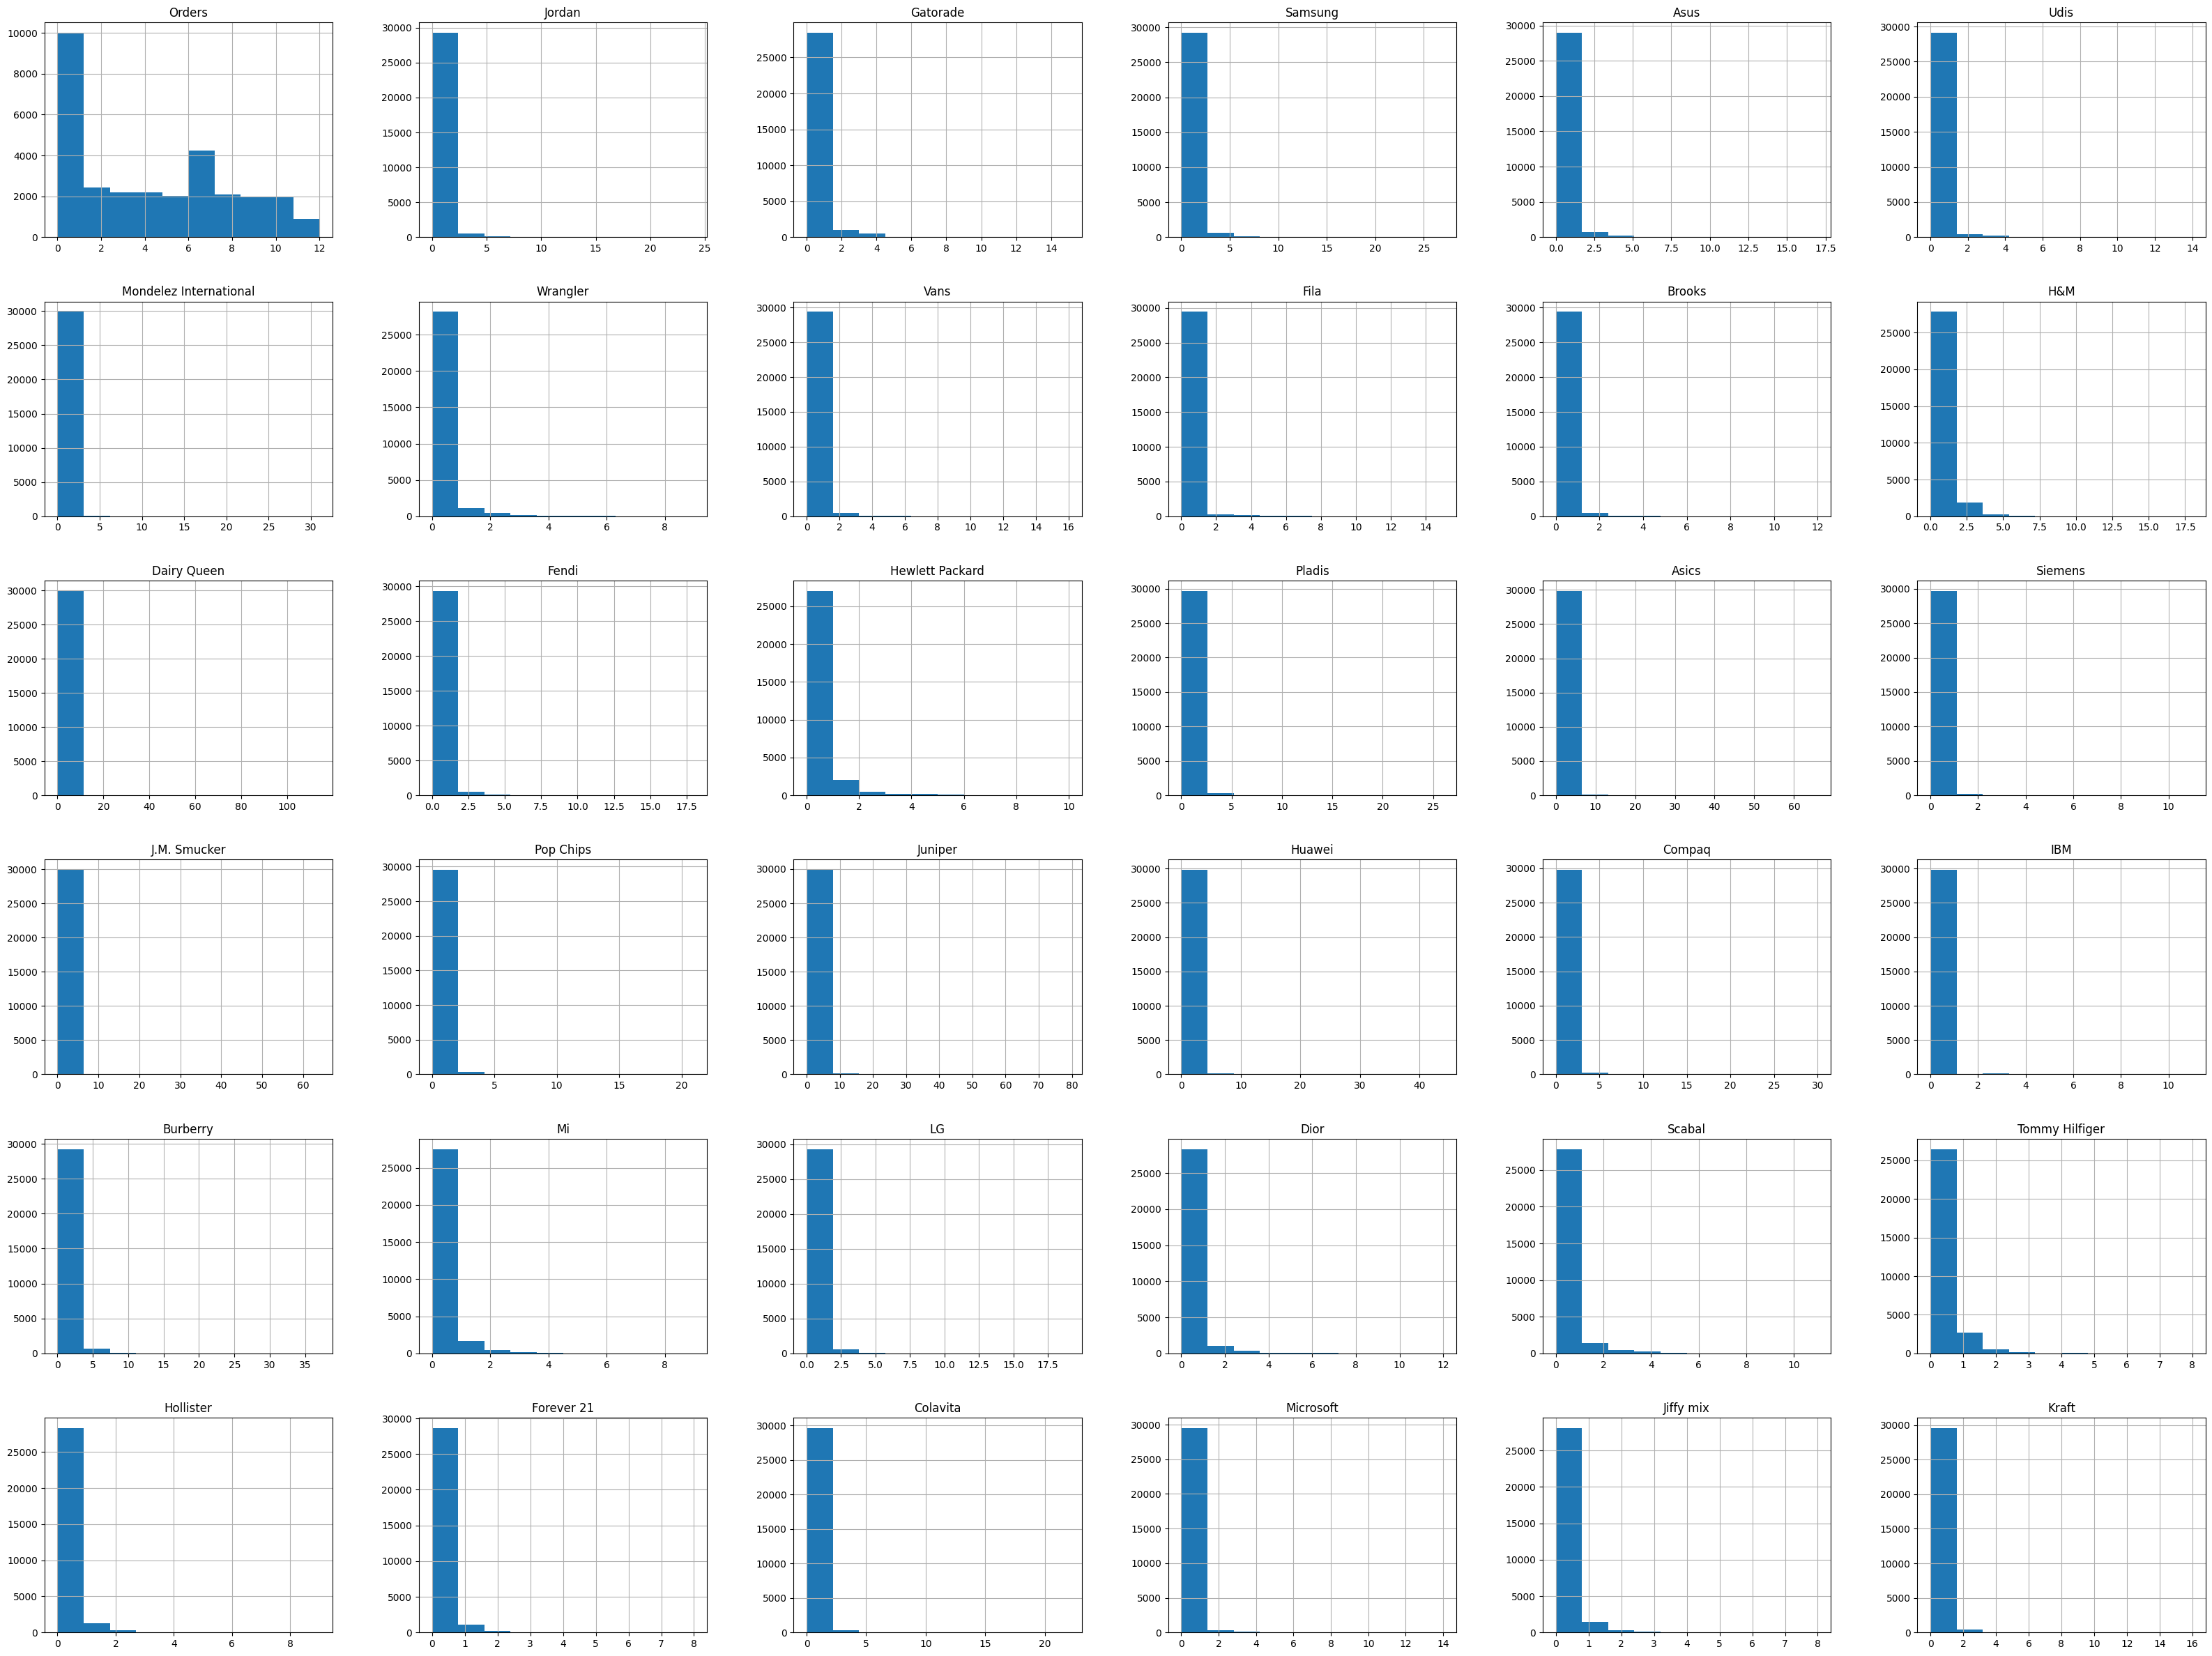

In [27]:
# Plotting Histogram:

daf.iloc[:,2:].hist(figsize=(40,30))
plt.show()

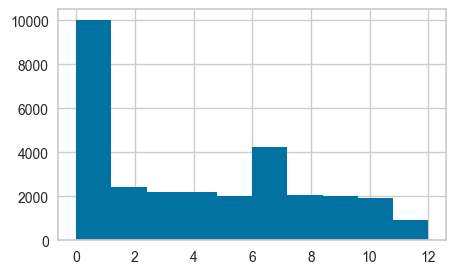

In [20]:
#
daf['Orders'].hist(figsize=(5,3))
plt.show()

In [21]:
new_daf = daf.copy() # Making a Copy of the data set:

In [22]:
new_daf.iloc[:,2:].sum(axis = 0) # # Row wise - sum() 

Orders                    125094
Jordan                      8023
Gatorade                    7570
Samsung                     6688
Asus                        4840
Udis                        4306
Mondelez International      4193
Wrangler                    3208
Vans                        3343
Fila                        2828
Brooks                      4204
H&M                         9846
Dairy Queen                 6280
Fendi                       4244
Hewlett Packard             4833
Pladis                      3183
Asics                       9007
Siemens                     1442
J.M. Smucker               22644
Pop Chips                   7437
Juniper                    14125
Huawei                      7740
Compaq                      3563
IBM                          959
Burberry                   12841
Mi                          3640
LG                          3076
Dior                        8134
Scabal                     11102
Tommy Hilfiger              4769
Hollister 

In [23]:
new_daf.iloc[:,2:].sum(axis = 1) # column wise - sum() 

0         9
1        18
2        12
3         2
4        26
         ..
29995     1
29996     2
29997     2
29998     1
29999     8
Length: 30000, dtype: int64

In [24]:
# new_daf = daf.copy() # making a copyof the original dataset:

new_daf['Total_Search'] = new_daf.iloc[:,2:].sum(axis=1)

In [25]:
new_daf['Total_Search'].head(10)

0     9
1    18
2    12
3     2
4    26
5    11
6    12
7    15
8     3
9    14
Name: Total_Search, dtype: int64

In [26]:
new_daf.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Search
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,18
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,12
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,NaN,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,26


In [ ]:
#

In [27]:
#Soritin the colmn is descending order:

new_daf.sort_values('Total_Search',ascending=False).head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total_Search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,162
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,138
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,128
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,108


In [ ]:
#

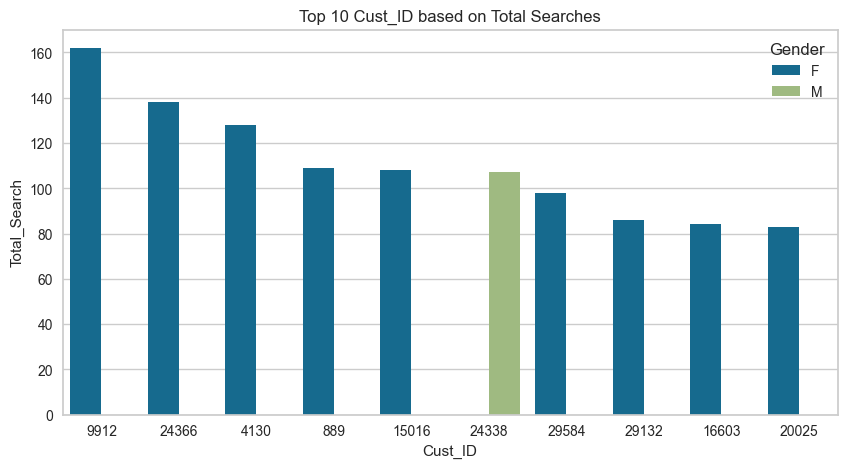

In [72]:
# Visualizing the top users with top search history:

plt.figure(figsize=(10,5))
#
plt_data = new_daf.sort_values('Total_Search',ascending=False)[['Cust_ID','Gender','Total_Search']].head(10)
#
sns.barplot(data=plt_data,
            x='Cust_ID',
            y='Total_Search',
            hue='Gender',
            order=plt_data.sort_values('Total_Search',ascending = False).Cust_ID)
#
plt.title("Top 10 Cust_ID based on Total Searches")
#
plt.show()

<Axes: xlabel='Total_Search', ylabel='Cust_ID'>

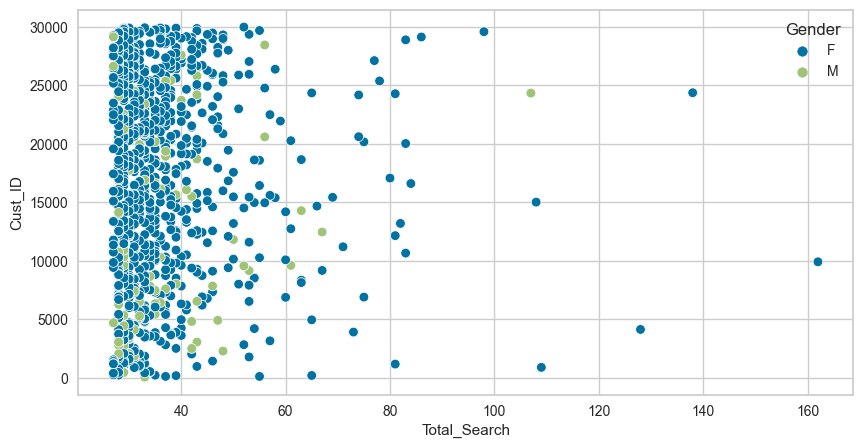

In [88]:
#
plt.figure(figsize=(10,5))
#
plt_data = new_daf.sort_values('Total_Search',ascending=False)[['Cust_ID','Gender','Total_Search']].head(1000)
#
sns.scatterplot(plt_data, x = 'Total_Search', y = 'Cust_ID',hue = 'Gender')
#

In [ ]:
#

In [29]:
# Initializing/settign the X-Variable.
x = daf.iloc[:,2: ].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
x.shape

(30000, 36)

In [31]:
# Scaling the metrics: * from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
features = scale.fit_transform(x)
#
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# --- #

In [32]:
inertia = []
#
for i in range(1,16): # randomly giving the value:1-16 
    k_means = KMeans(n_clusters=i)
    
    k_means = k_means.fit(features)
    
    inertia.append(k_means.inertia_) # to find the inertia 
 #   

C:\Users\DONMETHIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DONMETHIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DONMETHIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DONMETHIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DONMETHIL\anaconda3\lib\site-pa

In [89]:
print(len(inertia))


15


C:\Users\DONMETHIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DONMETHIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DONMETHIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DONMETHIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DONMETHIL\anaconda3\lib\site-pa

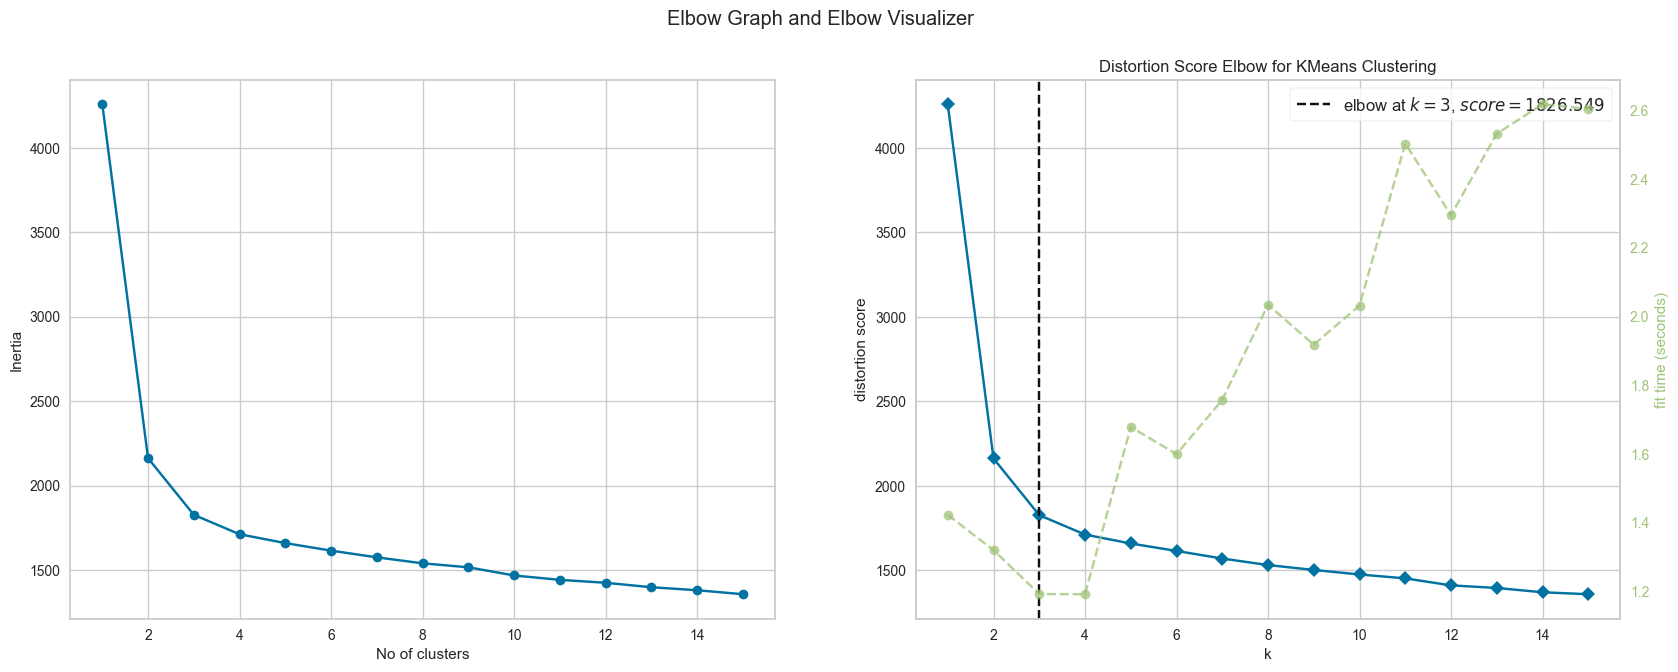

In [77]:
# Elbow graph:

plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(range(1,16), inertia, 'bo-')

plt.xlabel('No of clusters'), plt.ylabel('Inertia')
# ------------------------------------------------- #

# Kelbow visualizer: ||X||

plt.subplot(1,2,2)

kmeans = KMeans()

visualize = KElbowVisualizer(kmeans,k=(1,16)) # * from yellowbrick.cluster import KElbowVisualizer ||?||
visualize.fit(features)

plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()

plt.show()

# K-means Model

In [36]:
#
model = KMeans(n_clusters=3)
#
model = model.fit(features)
##

C:\Users\DONMETHIL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
##
# y_km = model.predict(features)
X = model.predict(features)
#
centers = model.cluster_centers_
#
centers

array([[0.37173183, 0.01206556, 0.0185703 , 0.00897841, 0.01000836,
        0.01049425, 0.00479667, 0.01246709, 0.00711641, 0.00595577,
        0.01137441, 0.01906266, 0.00177725, 0.00818852, 0.01592417,
        0.00422439, 0.00507145, 0.00437312, 0.01218528, 0.01187091,
        0.00622713, 0.00632001, 0.00388231, 0.00311288, 0.01215576,
        0.0138099 , 0.00490771, 0.02256122, 0.03442482, 0.01944609,
        0.0092812 , 0.00746445, 0.00877316, 0.00895396, 0.01147808,
        0.00445053],
       [0.72930361, 0.01144829, 0.01822232, 0.008606  , 0.01017554,
        0.01063447, 0.00458002, 0.01190476, 0.00729212, 0.00590126,
        0.01248904, 0.01982301, 0.00175861, 0.00832603, 0.01675066,
        0.00394391, 0.00479709, 0.00485021, 0.01240346, 0.01255165,
        0.00578135, 0.0059059 , 0.00411554, 0.00256952, 0.01176363,
        0.01404713, 0.00532774, 0.02305178, 0.03522628, 0.02022623,
        0.00845993, 0.00694292, 0.00891861, 0.00856079, 0.01144829,
        0.00416301],
      

In [93]:
print(X) # 30,000 - entries

[1 2 1 ... 2 2 0]


In [38]:
##
daf['Cluster'] = pd.DataFrame(X)
#
daf.to_csv("Cluster_data", index=False) # Creating a new dataset
#

In [39]:
daf['Cluster'].head()

0    1
1    2
2    1
3    2
4    1
Name: Cluster, dtype: int32

In [40]:
daf.tail()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
29999,30000,F,3,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#
daf['Cluster'].value_counts()

2    12432
1     9128
0     8440
Name: Cluster, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

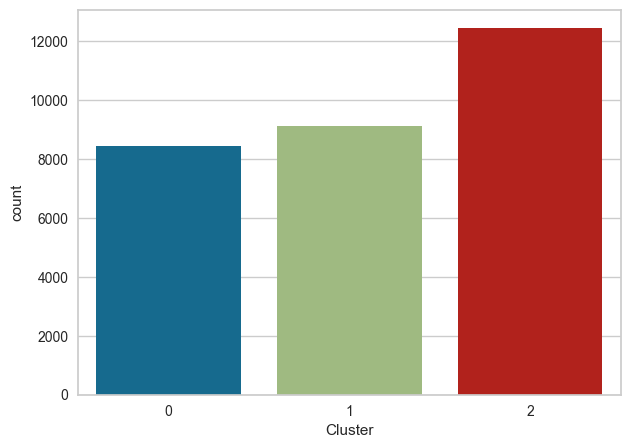

In [43]:
##
plt.figure(figsize=(7,5))
sns.countplot(data=daf,x='Cluster')
#
plt.show

***

In [96]:
c_daf = pd.read_csv('Cluster_data')
c_daf.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,5,NaN,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,1


In [97]:
c_daf['Total Search'] = c_daf.iloc[:,3:38].sum(axis=1)

In [101]:
c_daf['Total Search'].head()

0     2
1    18
2     5
3     2
4    16
Name: Total Search, dtype: int64

In [ ]:
#

# Cluster - 0 - Analysis

In [102]:
# ------------------------------------------ CLUSTER 01
cl_0 = c_daf.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster == 0')
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,96648546,27990,1785,1482,1568,1341,1113,1031,...,1875,2908,1116,608,439,1235,828,624,455,47783
1,0,M,21374453,6894,521,748,321,22,55,147,...,246,104,117,56,41,294,193,110,110,8543


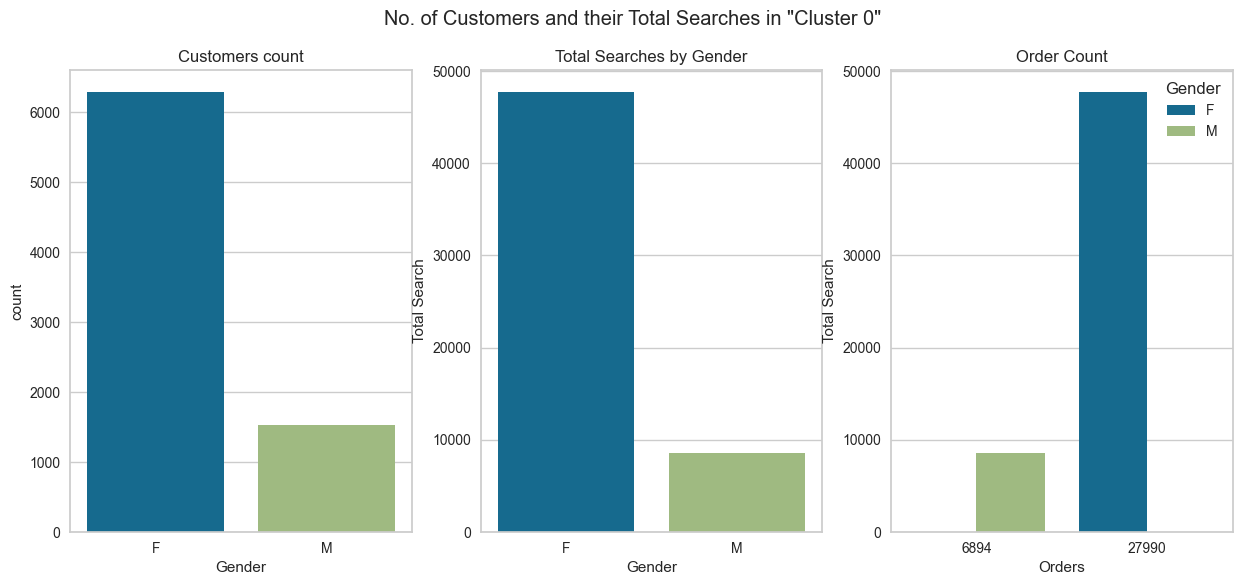

In [117]:
##
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot(data=c_daf.query('Cluster == 0'),x='Gender')
plt.title('Customers count')
#
plt.subplot(1,3,2)
sns.barplot(data=cl_0,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Total Searches in "Cluster 0"')
#
plt.subplot(1,3,3)
sns.barplot(data=cl_0,x='Orders',y='Total Search',hue='Gender')
plt.title('Order Count')
plt.show()

In [ ]:
#

# Cluster - 1 - Analysis

In [104]:
# ------------------------------------------  CLUSTER 02:
cl_1 = c_daf.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster == 1')
cl_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,106103730,59684,1831,1573,1627,1499,1216,1042,...,2055,3192,1225,541,419,1324,853,667,462,51128
3,1,M,22723520,14279,526,817,341,14,51,151,...,284,97,155,90,42,326,176,123,98,9322


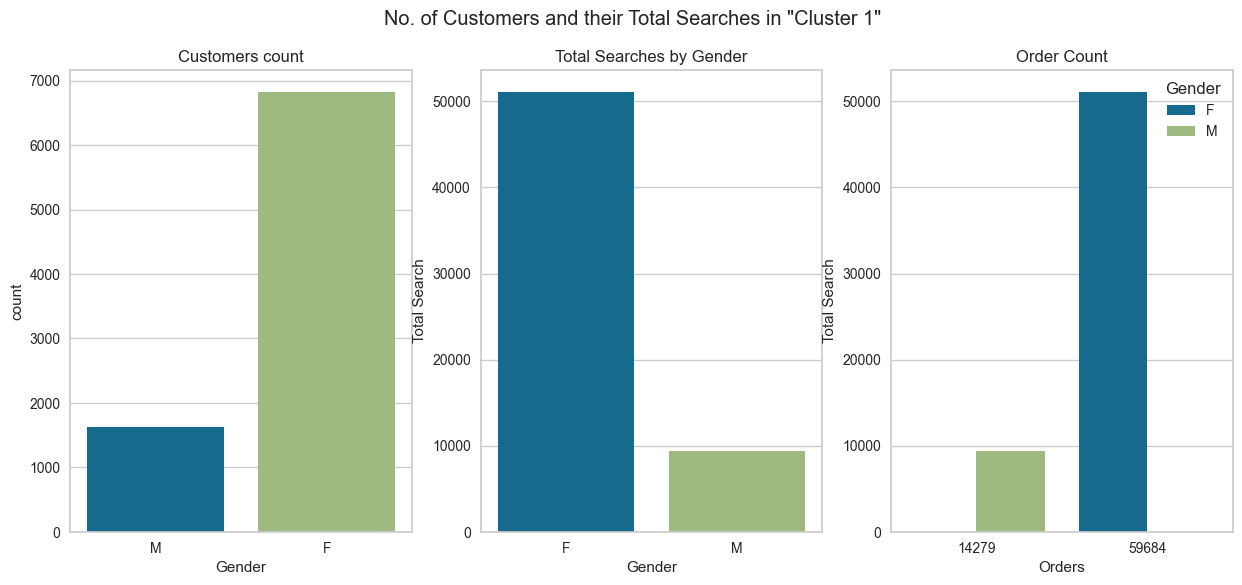

In [149]:
##
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot(data=c_daf.query('Cluster == 1'),x='Gender')
plt.title('Customers count')
#
plt.subplot(1,3,2)
sns.barplot(data=cl_1,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Total Searches in "Cluster 1"')
#
plt.subplot(1,3,3)
sns.barplot(data=cl_1,x='Orders',y='Total Search',hue='Gender')
plt.title('Order Count')
plt.show()

In [ ]:
#

# Cluster - 2 - Analysis

In [105]:
# ------------------------------------------  CLUSTER 03:
cl_2 = c_daf.groupby(['Cluster','Gender'],as_index=False).sum().query('Cluster == 2')
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,134763084,5639,2288,1771,1913,1707,1513,1344,...,2700,3801,1583,744,567,1720,1055,787,677,63857
5,2,M,28245384,1291,601,777,435,12,75,162,...,283,175,172,83,55,386,186,160,142,10787


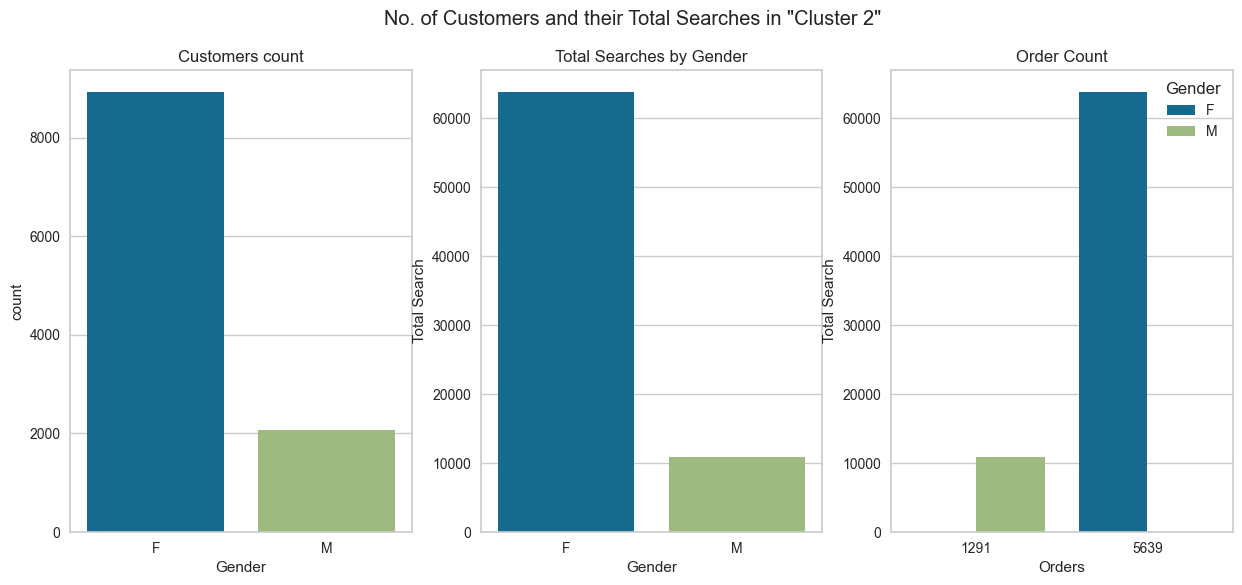

In [150]:
##
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot(data=c_daf.query('Cluster == 2'),x='Gender')
plt.title('Customers count')
#
plt.subplot(1,3,2)
sns.barplot(data=cl_2,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Total Searches in "Cluster 2"')
#
plt.subplot(1,3,3)
sns.barplot(data=cl_2,x='Orders',y='Total Search',hue='Gender')
plt.title('Order Count')
plt.show()

In [ ]:
# -------------------- # || # -------------------- # || # -------------------- #

In [ ]:
#

# Overall Analysis:

In [165]:
final_daf = c_daf.groupby(['Cluster'],as_index=False).sum()
final_daf

C:\Users\DONMETHIL\AppData\Local\Temp\ipykernel_7936\2825851219.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_daf = c_daf.groupby(['Cluster'],as_index=False).sum()


,Cluster,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,127844829,37649,2444,2351,2046,1436,1240,1255,947,...,2285,3196,1313,705,504,1629,1058,775,601,60093
1,1,139225430,79885,2508,2495,2121,1579,1359,1296,978,...,2525,3537,1477,695,507,1791,1094,836,608,64573
2,2,182944741,7560,3071,2724,2521,1825,1707,1642,1283,...,3324,4369,1979,930,709,2346,1339,1030,918,81477


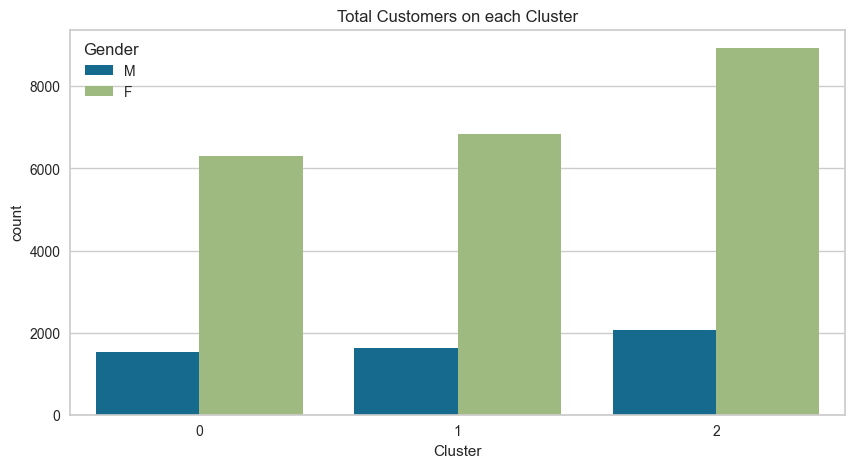

In [163]:
##
plt.figure(figsize=(10,5))
sns.countplot(data=c_daf,x='Cluster',hue='Gender')
plt.title('Total Customers on each Cluster')
#
plt.show()

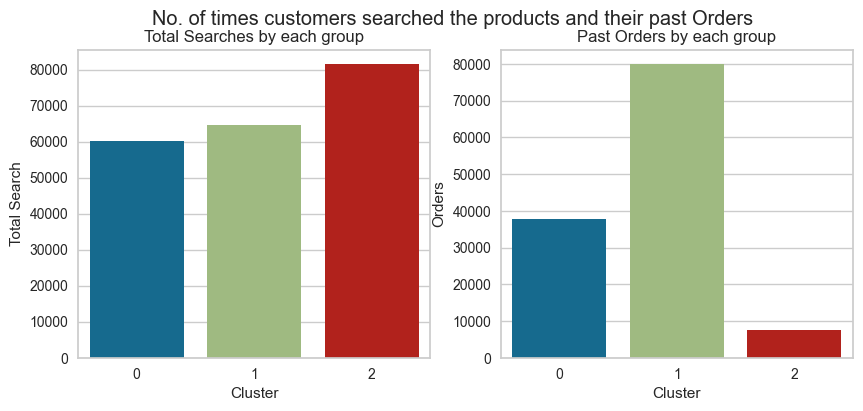

In [169]:
##
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.barplot(data=final_daf,x='Cluster',y='Total Search')

plt.title('Total Searches by each group')
#
plt.subplot(1,2,2)
sns.barplot(data=final_daf,x='Cluster',y='Orders')

plt.title('Past Orders by each group')
plt.suptitle('No. of times customers searched the products and their past Orders')
#
plt.show()

In [ ]:
#

* Conclusion: 

Among 30000 customer,
*
Cluster 0 has 12432 customers (Very Low past orders but done most searches) 
Cluster 1 has 9128 customers (Very High past orders and average searches) 
Cluster 2 has 8440 customers (Average past orders and average searches) 
*
Cluster 0 has many customers but their past orders is only 7560. 
Cluster 1 is at the top based on past orders with 79885 orders which is more than 10 times of Cluster 0. 
Cluster 2 has least number of customers but has 37649 past orders which is almost 500% greater than cluster 0. 
*
Cluster 0 has done most number of searches with 81477 searches.
Cluster 1 has 64573searches.
Cluster 2 has least number of searches with 60093 searches.
*

In [ ]:
# ----------------------------------END----------------------------------------- #

Scope:
    ● Analyzing the existing customer data and getting valuable insights
    about the purchase pattern
    ● Data pre-processing including missing value treatment
    ● Segmenting customer based on the optimum number of clusters (‘k’)
    with the help of silhouette score